In [30]:
import os
os.chdir('E:/Mission Data Scientist/INSOFE/CUTE/CUTE 4')

In [31]:
import numpy as np

In [33]:
train=np.load('train.npz')
x_train=train['data']
train_labels=train['labels']

In [34]:
test=np.load('test_with_labels.npz')
x_test=test['data']
test_labels=test['labels']

In [35]:
print('traindata',x_train.shape)
print('trainlabels',train_labels.shape)
print('testdata',x_test.shape)
print('testlabels',test_labels.shape)

traindata (20000, 28, 28)
trainlabels (20000,)
testdata (2000, 28, 28)
testlabels (2000,)


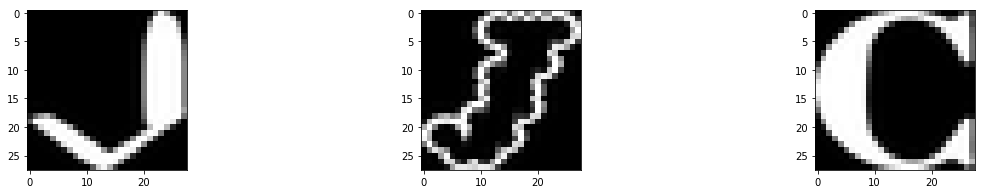

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
plt.imshow(x_train[20],cmap='gray')
plt.subplot(3,3,2)
plt.imshow(x_train[150],cmap='gray')
plt.subplot(3,3,3)
plt.imshow(x_train[750],cmap='gray')

In [39]:
batch_size = 32
nb_classes = 10
nb_epoch = 25

img_rows, img_cols = 28, 28
img_channels = 1

# Convert class vectors to binary class matrices.
from keras.utils import to_categorical
y_train = to_categorical(train_labels, nb_classes)
y_test = to_categorical(test_labels, nb_classes)
y_train.shape
y_test.shape

(2000, 10)

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D

model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3,3),padding='same', 
                        input_shape=(img_rows,img_cols,img_channels), 
                        activation='relu'))
model.add(Convolution2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [42]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
x_train=np.reshape(x_train,(20000,28,28,1))
x_test=np.reshape(x_test,(2000,28,28,1))
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
#x_train /= 255
#x_test /= 255

In [43]:
model.fit(x_train[:20000], y_train[:20000],
          batch_size=batch_size,
          epochs=nb_epoch,
          validation_data=(x_test[:2000],y_test[:2000]),
          shuffle=True)

Train on 20000 samples, validate on 2000 samples
Epoch 1/25
20000/20000 [==============================] - 141s 7ms/step - loss: 0.7059 - acc: 0.7859 - val_loss: 0.3534 - val_acc: 0.8935
Epoch 2/25
20000/20000 [==============================] - 131s 7ms/step - loss: 0.4606 - acc: 0.8610 - val_loss: 0.3013 - val_acc: 0.9065
Epoch 3/25
20000/20000 [==============================] - 134s 7ms/step - loss: 0.3970 - acc: 0.8795 - val_loss: 0.2744 - val_acc: 0.9210
Epoch 4/25
20000/20000 [==============================] - 139s 7ms/step - loss: 0.3521 - acc: 0.8911 - val_loss: 0.2618 - val_acc: 0.9220
Epoch 5/25
20000/20000 [==============================] - 135s 7ms/step - loss: 0.3229 - acc: 0.8977 - val_loss: 0.2554 - val_acc: 0.9225
Epoch 6/25
20000/20000 [==============================] - 131s 7ms/step - loss: 0.2946 - acc: 0.9076 - val_loss: 0.2480 - val_acc: 0.9255
Epoch 7/25
20000/20000 [==============================] - 133s 7ms/step - loss: 0.2731 - acc: 0.9136 - val_loss: 0.2614 - v

In [44]:
#evaluating model on test
model.evaluate(x_test,y_test)

2000/2000 [==============================] - 6s 3ms/step


[0.28618895853147841, 0.92649999999999999]

In [53]:
pred=model.predict(x_test)
import pandas as pd
df=pd.DataFrame(pred)

In [54]:
?pd.DataFrame

In [51]:
#writing the data frame into a csv file
pred.to
pred.to_csv('E:/Mission Data Scientist/INSOFE/classroom pdf/CNN/cifar_cnn',index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'